# Fetch Data Science Coding Challenge - Python

Problem Statement

In Python build a scraper that manipulates the associated text document (the first
chapter of the book Frankenstein) to do the following:

● Store all distinct words in the text in a dictionary and keep track of the word  
counts (make sure to strip all punctuation and lower the case of the words)

● There are 4 sentences in this text, composed of words that are “hidden”  
(bookended by special characters). Find the sentences in the text.

● Save the distinct word dictionary as a JSON file (call it 'word_count_dict.json')  

● Save the 4 hidden sentences together as a list of lists, then join them and print  
them with a for loop

● Remove the 4 hidden sentences from the original text file and save a clean  
version of the first chapter of Frankenstein to a text file (call it
'Clean_Frankenstein.txt')

● Plot a histogram of the count of words by word length for all words in the document  

## After carefully reading the instructions, I have reordered them:

### Part 1)

First, take a look at the 4 sentences and removed them from the text.

#### A) There are 4 sentences in this text, composed of words that are "hidden" (bookended by special characters). Find the sentences in the text.
#### B) Save the 4 hidden sentences together as a list of lists, then join them and print them with a for loop
#### C) Remove the 4 hidden sentences from the original text file and save a clean version of the first chapter of Frankenstein to a text file (call it 'Clean_Frankenstein.txt')

### Part 2)
Once I have removed the "hidden" sentences, we will have 'Clean_Frankenstein.txt' we would utilize that file for part 2 since otherwise we would include words from the hidden sentences

#### D) Store all distinct words in the text in a dictionary and keep track of the word counts (make sure to strip all punctuation and lower the case of the words)
#### E) Save the distinct word dictionary as a JSON file (call it 'word_count_dict.json')  
#### F) Plot a histogram of the count of words by word length for all words in the document 

Please find my Python Code below. I tried to maintain it as much as possible without removing or cleaning so that you see my way of thought

In [1]:
import docx
import itertools
import re

import pandas as pd
import os
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pprint

In [2]:
# os.getcwd()

In [3]:
fetch_challenge = docx.Document("Fetch Data Science Coding Challenge - Python.docx")

I will be using docx since we are scrapping the content from a local file (Word Document). There is no need to set up APIs for google drive or BeautifulSoup for web scrapping. This will help us preview the file by paragraph.

In [4]:
text_lines = []
for line in fetch_challenge.paragraphs:
    print(line.text)
    print("----")
    text_lines.append(line.text)
    "\n".join(text_lines)

ssss
----
Fetch Data Science & Analytics (DSA) – Python Coding Challenge
----

----
Background
----
Fetch Rewards’ most valued asset is an active, engaged and growing user base that interacts regularly with the app and keeps submitting receipts from their grocery purchase. They generate a ton of data that DSA leverages to create analytics solutions (ML models, dashboards, business analysis, etc.). SQL & Python are the languages we commonly use for that.  
----
Objective
----
Complete the below outlined, Python coding challenge. Plan to spend no more than 30-45mins overall. Approach matters more than the solution. 
----
Problem Statement
----
In Python build a scraper that manipulates the associated text document (the first chapter of the book Frankenstein) to do the following:
----
Store all distinct words in the text in a dictionary and keep track of the word counts (make sure to strip all punctuation and lower the case of the words)
----
There are 4 sentences in this text, composed o

I added --- so that we can distinguish the paragraphs. This way, we can only extract the text we care for from the docx file, which in this case is from Paragraph 22nd till the 36th

In [5]:
frankenstein_extract = text_lines[22:36]
print(frankenstein_extract)

['“Letter 1', 'To Mrs. Saville, England. <Scrapers<', 'St. Petersburgh, Dec. 11th, 17—.', 'You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my $You$ dear sister of my welfare and increasing confidence in the success of my undertaking.', "I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents $are$ itself to my imagination as the region of beauty and delight. There, Margaret, the sun is fo

The text above is what we are looking to analyze, so I will exclude everything else by making an extract.

In [6]:
frankenstein_extract = " ".join(frankenstein_extract)
with open("frankenstein_extract.txt", "w") as output:
    output.write(str(frankenstein_extract))

## Part 1:

By scanning through the text, I realized that there are a couple of symbols that are getting my attention. So, I decided to isolate the following ("$")("<")("#")("*")

### A) There are 4 sentences in this text, composed of words that are "hidden" (bookended by special characters). Find the sentences in the text.

In [7]:
with open("frankenstein_extract.txt") as f:
    ans1 = []
    for line in f:
        matches = re.findall(r"\$\S+\$", line)
        ans1.extend(matches)
with open("frankenstein_extract.txt") as f:
    ans2 = []
    for line in f:
        matches = re.findall(r"\<\S+\<", line)
        ans2.extend(matches)
with open("frankenstein_extract.txt") as f:
    ans3 = []
    for line in f:
        matches = re.findall(r"\#\S+\#", line)
        ans3.extend(matches)
with open("frankenstein_extract.txt") as f:
    ans4 = []
    for line in f:
        matches = re.findall(r"\*\S+\*", line)
        ans4.extend(matches)

In [8]:
list(zip(*[ans1, ans2, ans3, ans4]))

[('$You$', '<Scrapers<', '#Found#', "*You're*"),
 ('$are$', '<for<', '#another#', '*killin*'),
 ('$amazing!$', '<the<', '#one!#', '*it!*')]

In [9]:
sentence1 = [ans1.strip("$") for ans1 in ans1]
sentence2 = [ans2.strip("<") for ans2 in ans2]
sentence3 = [ans3.strip("#") for ans3 in ans3]
sentence4 = [ans4.strip("*") for ans4 in ans4]
print(list(sentence1))
print(list(sentence2))
print(list(sentence3))
print(list(sentence4))

['You', 'are', 'amazing!']
['Scrapers', 'for', 'the', 'win!']
['Found', 'another', 'one!']
["You're", 'killin', 'it!']


To store the unique words in the text, I will first remove then four hidden sentences. So, that we only count the words from Frankenstein.

In [10]:
text_file = open("frankenstein_extract.txt") # the extract we created

In [11]:
text = text_file.read()
words = text.split()

unfiltered = []
for word in words:
    if word not in unfiltered:
        unfiltered.append(word)
unfiltered.sort()
unfiltered = list(unfiltered)
print(str(unfiltered))

['#Found#', '#another#', '#one!#', '$You$', '$amazing!$', '$are$', "*You're*", '*it!*', '*killin*', '1', '11th,', '17—.', '<Scrapers<', '<for<', '<the<', 'Ah,', 'And', 'Archangel.', 'But', 'Dec.', 'Do', 'England.', 'English', 'Farewell,', 'Greenland', 'Heaven', 'Homer', 'I', 'If', 'Inspirited', 'Its', 'June;', 'London,', 'Margaret,', 'Margaret.', 'Mrs.', 'My', 'North', 'Ocean', 'Oh,', 'Pacific', 'Petersburgh', 'Petersburgh,', 'R.', 'Russia.', 'Saville,', 'Sea;', 'Shakespeare', 'Six', 'St.', 'The', 'There,', 'There—for', 'These', 'They', 'This', 'Thomas’', 'To', 'Twice', 'Uncle', 'Walton<win!<”', 'What', 'You', 'Your', 'a', 'about', 'accompanied', 'accomplish', 'accounts', 'accustomed', 'acquainted', 'acquitted', 'actually', 'admiration.', 'adopted,', 'advancing,', 'advantage.', 'adventurer', 'affectionate', 'affirmative!', 'again', 'agitation', 'agreeable', 'all', 'allow', 'already', 'also', 'am', 'ambition', 'among', 'an', 'and', 'and,', 'answer', 'ardent', 'ardour', 'are', 'arrived',

### B) Save the 4 hidden sentences together as a list of lists, then join them and print them with a for loop

utilizing itertools (the way I would have done it) 

In [12]:
list(zip(*[ans1, ans2, ans3, ans4]))

[('$You$', '<Scrapers<', '#Found#', "*You're*"),
 ('$are$', '<for<', '#another#', '*killin*'),
 ('$amazing!$', '<the<', '#one!#', '*it!*')]

In [13]:
remove_list = itertools.chain(ans1, ans2, ans3, ans4)
remove_list = list(remove_list)
print(remove_list)

['$You$', '$are$', '$amazing!$', '<Scrapers<', '<for<', '<the<', '<win!<', '#Found#', '#another#', '#one!#', "*You're*", '*killin*', '*it!*']


Since it suggested to join them with a for loop: 

In [14]:
res_list = [y for x in [ans1, ans2, ans3, ans4] for y in x]
print(res_list)

['$You$', '$are$', '$amazing!$', '<Scrapers<', '<for<', '<the<', '<win!<', '#Found#', '#another#', '#one!#', "*You're*", '*killin*', '*it!*']


remove_list solving through itertools is equivalent to solving it with a for loop res_list (remove_list = res_list)

### C) Remove the 4 hidden sentences from the original text file and save a clean version of the first chapter of Frankenstein to a text file (call it 'Clean_Frankenstein.txt')

In [15]:
infile = "frankenstein_extract.txt"
outfile = "clean_frankenstein.txt"

In [16]:
# remove_list
with open(infile) as fin, open(outfile, "w+") as fout:
    for line in fin:
        for word in remove_list:
            line = line.replace(word, "")
        fout.write(line)

In [17]:
clean_frankenstein = open("clean_frankenstein.txt")
lines = clean_frankenstein.readlines()
for line in lines:
    print(line)
clean_frankenstein.close()

“Letter 1 To Mrs. Saville, England.  St. Petersburgh, Dec. 11th, 17—. You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my  dear sister of my welfare and increasing confidence in the success of my undertaking. I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents  itself to my imagination as the region of beauty and delight. There, Margaret, the sun is for ever visible, its broad disk jus

## Part 2)

Now that we have removed the hidden sentences, we want to do a clean-up of the text "unfiltered."

In [18]:
# using lambda to perform task
res = [i for i in unfiltered if i not in remove_list]
unfiltered = str(res)
print(unfiltered)

['1', '11th,', '17—.', 'Ah,', 'And', 'Archangel.', 'But', 'Dec.', 'Do', 'England.', 'English', 'Farewell,', 'Greenland', 'Heaven', 'Homer', 'I', 'If', 'Inspirited', 'Its', 'June;', 'London,', 'Margaret,', 'Margaret.', 'Mrs.', 'My', 'North', 'Ocean', 'Oh,', 'Pacific', 'Petersburgh', 'Petersburgh,', 'R.', 'Russia.', 'Saville,', 'Sea;', 'Shakespeare', 'Six', 'St.', 'The', 'There,', 'There—for', 'These', 'They', 'This', 'Thomas’', 'To', 'Twice', 'Uncle', 'Walton<win!<”', 'What', 'You', 'Your', 'a', 'about', 'accompanied', 'accomplish', 'accounts', 'accustomed', 'acquainted', 'acquitted', 'actually', 'admiration.', 'adopted,', 'advancing,', 'advantage.', 'adventurer', 'affectionate', 'affirmative!', 'again', 'agitation', 'agreeable', 'all', 'allow', 'already', 'also', 'am', 'ambition', 'among', 'an', 'and', 'and,', 'answer', 'ardent', 'ardour', 'are', 'arrived', 'arriving', 'as', 'ascertaining', 'assure', 'at', 'attracts', 'banished;', 'be', 'beauty', 'became', 'become', 'been', 'before', '

In [19]:
unfiltered = unfiltered.lower()
filtered_words = unfiltered.split()

In [20]:
filtered_words = [word.replace("—", "").replace("-", "") for word in filtered_words]
filtered_words = [word.replace("’s", "") for word in filtered_words]
filtered_words = [word.replace("'", "")for word in filtered_words]
filtered_words = [word.strip(".,!?;()[]--—“”’") for word in filtered_words]
print(filtered_words)

['1', '11th', '17', 'ah', 'and', 'archangel', 'but', 'dec', 'do', 'england', 'english', 'farewell', 'greenland', 'heaven', 'homer', 'i', 'if', 'inspirited', 'its', 'june', 'london', 'margaret', 'margaret', 'mrs', 'my', 'north', 'ocean', 'oh', 'pacific', 'petersburgh', 'petersburgh', 'r', 'russia', 'saville', 'sea', 'shakespeare', 'six', 'st', 'the', 'there', 'therefor', 'these', 'they', 'this', 'thomas', 'to', 'twice', 'uncle', 'walton<win!<', 'what', 'you', 'your', 'a', 'about', 'accompanied', 'accomplish', 'accounts', 'accustomed', 'acquainted', 'acquitted', 'actually', 'admiration', 'adopted', 'advancing', 'advantage', 'adventurer', 'affectionate', 'affirmative', 'again', 'agitation', 'agreeable', 'all', 'allow', 'already', 'also', 'am', 'ambition', 'among', 'an', 'and', 'and', 'answer', 'ardent', 'ardour', 'are', 'arrived', 'arriving', 'as', 'ascertaining', 'assure', 'at', 'attracts', 'banished', 'be', 'beauty', 'became', 'become', 'been', 'before', 'began', 'benefit', 'bent', 'bet

### D) Store all distinct words in the text in a dictionary and keep track of the word counts (make sure to strip all punctuation and lower the case of the words)

In [21]:
filtered_words_count = dict(Counter(filtered_words))
print(filtered_words_count)

{'1': 1, '11th': 1, '17': 1, 'ah': 1, 'and': 3, 'archangel': 1, 'but': 2, 'dec': 1, 'do': 2, 'england': 1, 'english': 1, 'farewell': 1, 'greenland': 1, 'heaven': 3, 'homer': 1, 'i': 1, 'if': 2, 'inspirited': 1, 'its': 2, 'june': 1, 'london': 1, 'margaret': 2, 'mrs': 1, 'my': 2, 'north': 2, 'ocean': 1, 'oh': 1, 'pacific': 1, 'petersburgh': 2, 'r': 1, 'russia': 1, 'saville': 1, 'sea': 2, 'shakespeare': 1, 'six': 1, 'st': 1, 'the': 2, 'there': 3, 'therefor': 1, 'these': 2, 'they': 2, 'this': 2, 'thomas': 1, 'to': 2, 'twice': 1, 'uncle': 2, 'walton<win!<': 1, 'what': 1, 'you': 3, 'your': 2, 'a': 1, 'about': 1, 'accompanied': 1, 'accomplish': 1, 'accounts': 1, 'accustomed': 1, 'acquainted': 1, 'acquitted': 1, 'actually': 1, 'admiration': 1, 'adopted': 1, 'advancing': 1, 'advantage': 1, 'adventurer': 1, 'affectionate': 1, 'affirmative': 1, 'again': 1, 'agitation': 1, 'agreeable': 1, 'all': 1, 'allow': 1, 'already': 1, 'also': 1, 'am': 1, 'ambition': 1, 'among': 1, 'an': 1, 'answer': 1, 'arde

As a way to preview the words (optional):

In [22]:
pprint.pprint(filtered_words_count)

{'1': 1,
 '11th': 1,
 '17': 1,
 'a': 1,
 'about': 1,
 'accompanied': 1,
 'accomplish': 1,
 'accounts': 1,
 'accustomed': 1,
 'acquainted': 1,
 'acquitted': 1,
 'actually': 1,
 'admiration': 1,
 'adopted': 1,
 'advancing': 1,
 'advantage': 1,
 'adventurer': 1,
 'affectionate': 1,
 'affirmative': 1,
 'again': 1,
 'agitation': 1,
 'agreeable': 1,
 'ah': 1,
 'all': 1,
 'allow': 1,
 'already': 1,
 'also': 1,
 'am': 1,
 'ambition': 1,
 'among': 1,
 'an': 1,
 'and': 3,
 'answer': 1,
 'archangel': 1,
 'ardent': 1,
 'ardour': 1,
 'are': 1,
 'arrived': 1,
 'arriving': 1,
 'as': 1,
 'ascertaining': 1,
 'assure': 1,
 'at': 1,
 'attracts': 1,
 'banished': 1,
 'be': 1,
 'beauty': 1,
 'became': 1,
 'become': 1,
 'been': 1,
 'before': 1,
 'began': 1,
 'benefit': 1,
 'bent': 1,
 'between': 1,
 'blessings': 1,
 'blood': 1,
 'boat': 1,
 'bodies': 1,
 'body': 1,
 'bore': 1,
 'braces': 1,
 'branches': 1,
 'breeze': 2,
 'broad': 1,
 'brother': 1,
 'but': 2,
 'by': 1,
 'calm': 1,
 'can': 2,
 'cannot': 1,
 'c

### E) Save the distinct word dictionary as a JSON file (call it 'word_count_dict.json')  

In [23]:
out_file = open("word_count_dict.json", "w")
json.dump(filtered_words_count, out_file, indent=4, sort_keys=False)
out_file.close()

### F) Plot a histogram of the count of words by word length for all words in the document 

In [24]:
print(filtered_words)

['1', '11th', '17', 'ah', 'and', 'archangel', 'but', 'dec', 'do', 'england', 'english', 'farewell', 'greenland', 'heaven', 'homer', 'i', 'if', 'inspirited', 'its', 'june', 'london', 'margaret', 'margaret', 'mrs', 'my', 'north', 'ocean', 'oh', 'pacific', 'petersburgh', 'petersburgh', 'r', 'russia', 'saville', 'sea', 'shakespeare', 'six', 'st', 'the', 'there', 'therefor', 'these', 'they', 'this', 'thomas', 'to', 'twice', 'uncle', 'walton<win!<', 'what', 'you', 'your', 'a', 'about', 'accompanied', 'accomplish', 'accounts', 'accustomed', 'acquainted', 'acquitted', 'actually', 'admiration', 'adopted', 'advancing', 'advantage', 'adventurer', 'affectionate', 'affirmative', 'again', 'agitation', 'agreeable', 'all', 'allow', 'already', 'also', 'am', 'ambition', 'among', 'an', 'and', 'and', 'answer', 'ardent', 'ardour', 'are', 'arrived', 'arriving', 'as', 'ascertaining', 'assure', 'at', 'attracts', 'banished', 'be', 'beauty', 'became', 'become', 'been', 'before', 'began', 'benefit', 'bent', 'bet

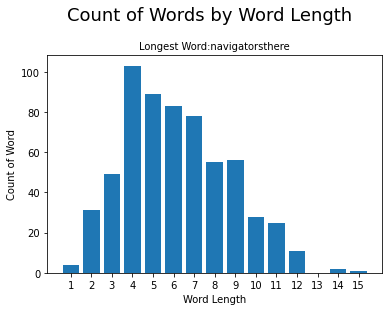

In [25]:
# used dict to count lenghts
d = {}
for w in filtered_words:
    l = len(w)
    d[l] = d.get(l, 0) + 1
# get info from the dict 
lenghts, counts = zip(*d.items())
# plot
plt.bar(lenghts, counts)
plt.xticks(range(1, max(lenghts)+1))
plt.xlabel('Word Length')
plt.ylabel('Count of Word')
plt.suptitle('Count of Words by Word Length', y=1.05, fontsize=18)
# what is the longest word?
plt.title('Longest Word:'+ ' '.join(w for w in filtered_words if len(w)==max(lenghts)), fontsize=10)

plt.show()

Pondria. Numer of letters in word y number of words para los titulos

We can see that we have an slight Right-Skewed histogram 

# ---------------Extra----------------

#### Show a plot of the top 20 most used words

In [26]:
word_list = filtered_words
counts = dict(Counter(word_list).most_common(20))
labels, values = zip(*counts.items())
indSort = np.argsort(values)[::-1]

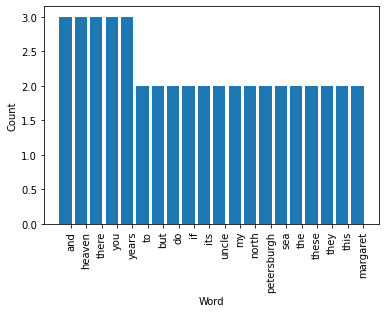

In [27]:
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(indexes + bar_width, labels, rotation = 90)
plt.show()

#### Since we built a dictionary, we can give it some use and import the meanings

We want to remove duplicates from filtered_words

In [28]:
unique = []
for word in filtered_words:
    if word not in unique:
        unique.append(word)

In [29]:
from PyDictionary import PyDictionary

In [30]:
dictionary = PyDictionary(unique)
print(dictionary.printMeanings())

1:
Noun:
the smallest whole number or a numeral representing this number
Adjective:
used of a single unit or thing; not two or more
11th:
Adjective:
coming next after the tenth and just before the twelfth in position
17:
Noun:
the cardinal number that is the sum of sixteen and one
Adjective:
being one more than sixteen
Ah:
And:
Archangel:
Noun:
an angel ranked above the highest rank in the celestial hierarchy
a biennial cultivated herb; its stems are candied and eaten and its roots are used medicinally
But:
Adverb:
and nothing more
Dec:
Noun:
the last (12th
(astronomy
Do:
Noun:
an uproarious party
the syllable naming the first (tonic
doctor's degree in osteopathy
Verb:
engage in
carry out or perform an action
get (something
proceed or get along
give rise to; cause to happen or occur, not always intentionally
carry out or practice; as of jobs and professions
be sufficient; be adequate, either in quality or quantity
create or design, often in a certain way
behave in a certain manner; sho

a person regarded very fondly
having abundant light or illumination
mental understanding as an enlightening experience
merriment expressed by a brightness or gleam or animation of countenance
public awareness
a divine presence believed by Quakers to enlighten and guide the soul
a visual warning signal
a device for lighting or igniting fuel or charges or fires
Verb:
make lighter or brighter
begin to smoke
to come to rest, settle
cause to start burning; subject to fire or great heat
fall to somebody by assignment or lot
alight from (a horse
start or maintain a fire in
Adjective:
of comparatively little physical weight or density
(used of color
of the military or industry; using (or being
not great in degree or quantity or number
psychologically light; especially free from sadness or troubles
characterized by or emitting light
(used of vowels or syllables
easily assimilated in the alimentary canal; not rich or heavily seasoned
(used of soil
(of sound or color
moving easily and quickly; ni

mate with
Trust:
Noun:
something (as property
the trustee
the beneficiary
certainty based on past experience
the trait of believing in the honesty and reliability of others
a consortium of independent organizations formed to limit competition by controlling the production and distribution of a product or service
complete confidence in a person or plan etc
a trustful relationship
Verb:
have confidence or faith in
allow without fear
be confident about something
expect and wish
confer a trust upon
(chiefly archaic
Try:
Noun:
earnest and conscientious activity intended to do or accomplish something
Verb:
make an effort or attempt
put to the test, as for its quality, or give experimental use to
put on trial or hear a case and sit as the judge at the trial of
take a sample of
examine or hear (evidence or a case
give pain or trouble to
test the limits of
melt (fat or lard
put on a garment in order to see whether it fits and looks nice
Turned:
Verb:
change orientation or direction, also in the